<a href="https://colab.research.google.com/github/elvinagam/Tesseract-OCR-AZE/blob/main/OCR_Tesseract_AZE_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesseract 4.0.0
This is an example of Tesseract OCR for different languages including Azerbaijani.
For Latin-based languages, the existing model data provided has been trained on about 400000 text lines spanning about 4500 fonts. [Tesseract Pretrained Models for different languages including AZE and AZE Cryl](https://github.com/tesseract-ocr/tessdata_fast)


## Libraries
Note: PIL can cause some headaches depending on which installation you previously had.

In [1]:
# !sudo apt install tesseract-ocr
# !pip install pytesseract
# !apt-get install poppler-utils 
# !pip install pdf2image
import cv2
import pytesseract
from pytesseract import Output
try:
    from PIL import Image
except ImportError:
    import Image
import matplotlib.pyplot as plt
from pdf2image import convert_from_path, convert_from_bytes
import re
from google.colab.patches import cv2_imshow

In [2]:
!cat /etc/*release
print(f'Using {pytesseract.get_tesseract_version()}')

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.6 LTS"
NAME="Ubuntu"
VERSION="18.04.6 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.6 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic
Using 4.0.0


## Read Images

In [ ]:
from google.colab import files
files.upload()

In [4]:
image_path = '/content/sened_2.png'
extractedInformation = pytesseract.image_to_string(Image.open(image_path))

In [5]:
print(extractedInformation)

Bankin qeydi
Kodlar

Fordi sahibkarlann (fiziki saxstarin) imza niimunalari

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

vaeragasi

Hesabin sahibi imza nomunalarini qabul etmaya

icaze veran

Bas mahasib

(Ad, atasinin adi, soyadh)

(va ya milavini) (imza)

{Soxsivyati tasdiq edan sonad No /OEN
20__il
(fordi
[Tare organin sahibkar)
lad
Kinvan
[Tel NO Faks NO igor geydlor
Bankin adi
SWIFT KODU
Bankin Unvant
Ixahis edirik, gdstarilan imza(lar) nimunasini hesab Uzra
ppmaliyyatiar apararkon zoruri hesab edasiniz
Arxa tarefi
No—li hesab

IHesab (izre omaliyyat aparan sexsin adi, atasinin adi, soyadi| —_imza niimunla Qeyd

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 



In [ ]:
img = cv2.imread(image_path)
d = pytesseract.image_to_data(img, output_type= Output.STRING)

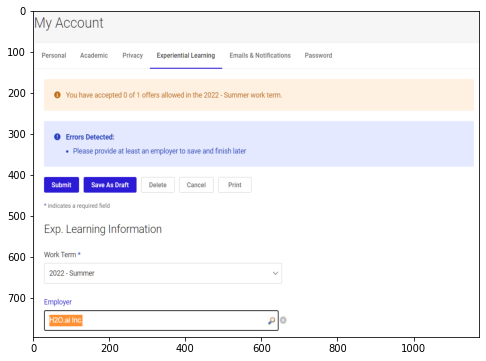

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(img, aspect='auto')

## Read PDFs

In [ ]:
images = convert_from_path('ALY.pdf')
print ("Number of pages: " + str(len(images)))
for i in range (len(images)):
  if i > 2:
    continue
  print ("Page N°" + str(i+1) + "\n")
  print(pytesseract.image_to_string(images[i]))

Number of pages: 7
Page N°1

Northeastern University
College of Professional Studies

Chi-Square testing and ANOVA

Overview and Rationale

In this assignment, you will use your knowledge of chi-square and ANOVA testing to solve
various types of problems.

Course Outcomes

This assignment is directly linked to the following key learning outcomes from the course
syllabus:
CLO4: Testa distribution for goodness of fit, using chi-square.
CLOS: Test two variables for independence, using chi-square.
CLO6: Test proportions for homogeneity, using chi-square.
CLO7: Use the one-way ANOVA technique to determine if there is a significant difference among
three or more means.
CLO9: Use the two-way ANOVA technique to determine if there is a significant difference in the
main effects or interaction.

Assignment Summary

Complete the following problems using R and/or MS Excel. Be sure to show your work and
include the hypothesis tests, the critical values, the computed test values, and the resulting
d

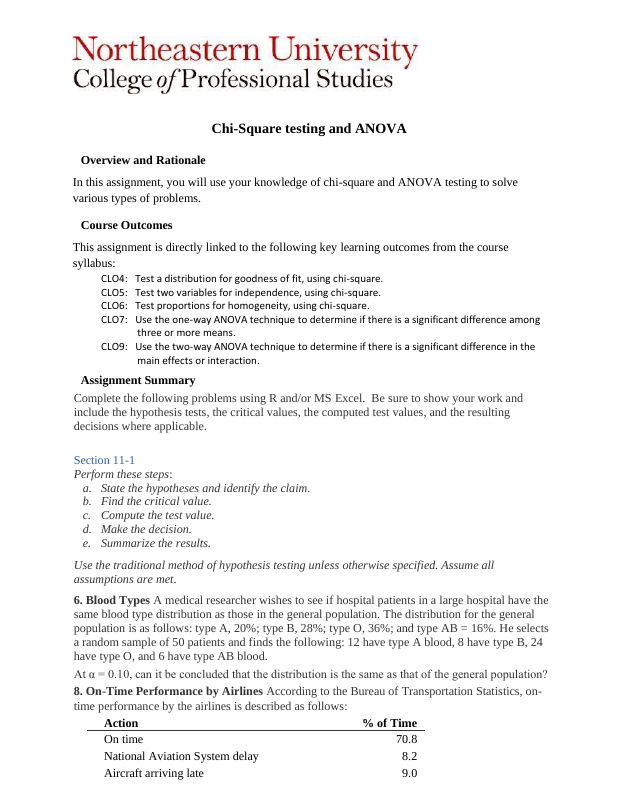

In [ ]:
images = convert_from_bytes(open('ALY.pdf', 'rb').read(), size=800)
display(images[0])

## Simple Image Cleaning Techniques

In [ ]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,3)
  
# thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
 
# dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
     
# erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)
 
# opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
 
# canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)
 
# skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated
 
# template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

    

ir _ceci est un test



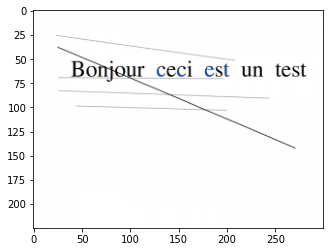

In [ ]:
image_original = cv2.imread('/content/french.png')
print(pytesseract.image_to_string(image_original))
plt.imshow(image_original,'gray')

Bonjour ceci est un test



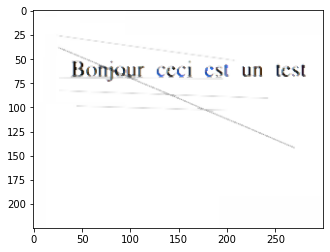

In [ ]:
retouche3 = remove_noise(image_original)
print(pytesseract.image_to_string(retouche3))
plt.imshow(retouche3)

Bonjour cecil est un test



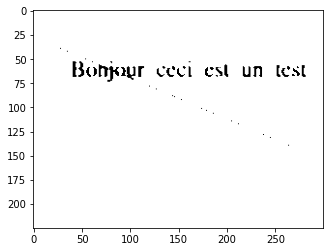

In [ ]:
retouche4 = thresholding(grayscale(remove_noise(image_original)))
print(pytesseract.image_to_string(retouche4))
plt.imshow(retouche4,'gray')

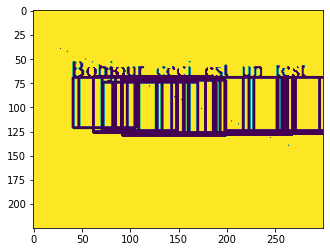

In [ ]:
h, w, c = image_original.shape
boxes = pytesseract.image_to_boxes(image_original)

for b in boxes.splitlines():
  b = b.split(' ')
  img = cv2.rectangle(retouche4, (int(b[1]), h - int(b[2]), (int(b[3])), h - int(b[4])), (0, 255, 0), 2)
plt.imshow(img)

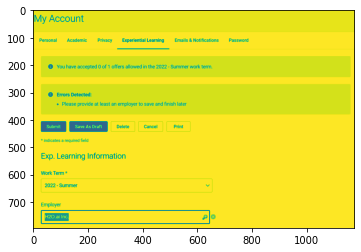

In [ ]:
idcard = cv2.imread(image_path, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(idcard, cv2.COLOR_BGR2GRAY)
denoised = cv2.fastNlMeansDenoising(gray, None, 3, 7, 21)
plt.imshow(denoised)    

# Invoice Bounding boxes

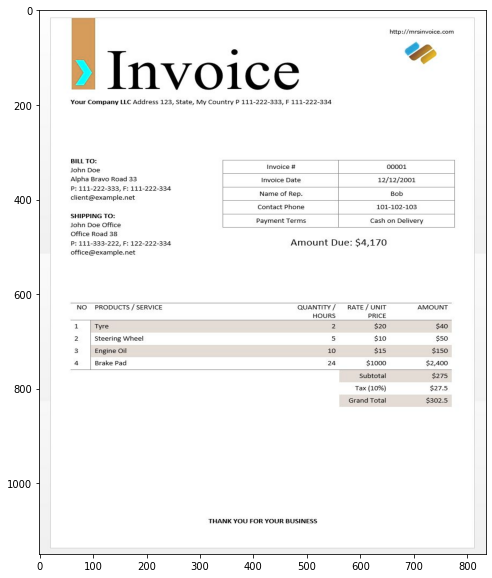

In [ ]:
invoice = cv2.imread("invoice-sample.jpg")
plt.figure(figsize = (8, 10))
plt.imshow(invoice, 'gray', aspect = 'auto')
d = pytesseract.image_to_data(invoice, output_type=Output.DICT)

In [ ]:
d = pytesseract.image_to_data(invoice, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


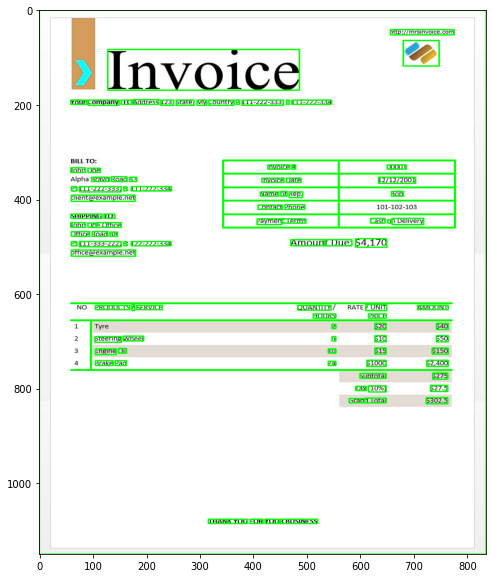

In [ ]:
number_of_boxes = len(d['text'])
for i in range(number_of_boxes):
  if d['conf'][i] > 60: 
    x, y, w, h = d['left'][i], d['top'][i], d['width'][i], d['height'][i]
    img = cv2.rectangle(invoice, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.figure(figsize = (8, 10))
plt.imshow(img, 'gray', aspect = 'auto')

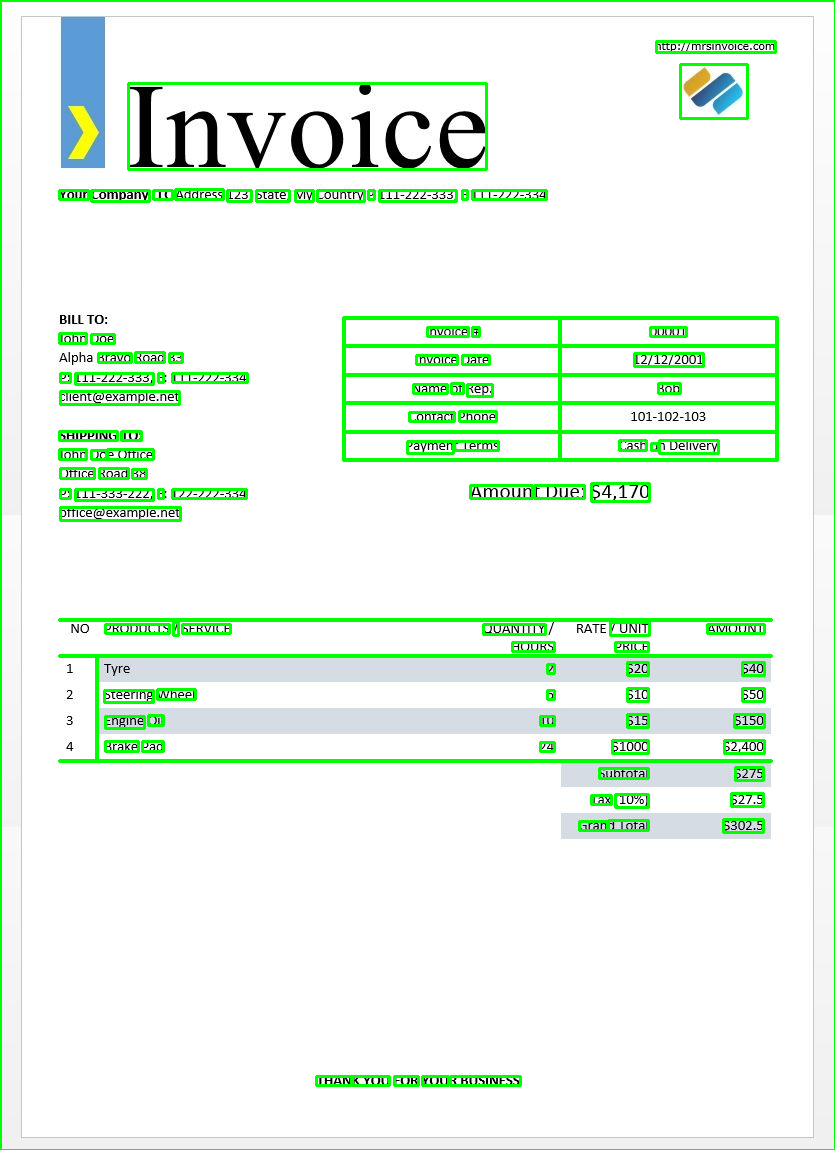

In [ ]:
cv2_imshow(img)

## Template matching: Date Pattern

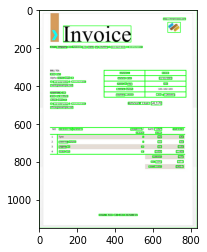

In [ ]:
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

for i in range(number_of_boxes):
  if d['conf'][i] > 60:
    if re.match(date_pattern, d['text'][i]):
      x, y, w, h = d['left'][i], d['top'][i], d['width'][i], d['height'][i]
      date = cv2.rectangle(invoice, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(date, 'gray')

## Text Orientation

In [ ]:
osd = pytesseract.image_to_osd(invoice)
print(osd)
angle = re.search('(?<=Rotate: )\d+', osd).group(0)
print("angle: ", angle)


Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.06
Script: Cyrillic
Script confidence: 11.67

angle:  0


## Tesseract for Languages: AZE

In [15]:
!sudo apt install tesseract-ocr-aze

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tesseract-ocr-tur
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,574 kB of archives.
After this operation, 4,565 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-tur all 4.00~git24-0e00fe6-1.2 [1,574 kB]
Fetched 1,574 kB in 1s (2,074 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling 

In [ ]:
img = cv2.imread("/content/sened_1.jpg")

In [ ]:
custom_config = r'-l aze --psm 6'

### Automatically detect the language
This module again, does not detect the language of text using an image but needs string input to detect the language from. The best way to do this is by first using tesseract to get OCR text in whatever languages you might feel are in there, using langdetect to find what languages are included in the OCR text and then run OCR again with the languages found.

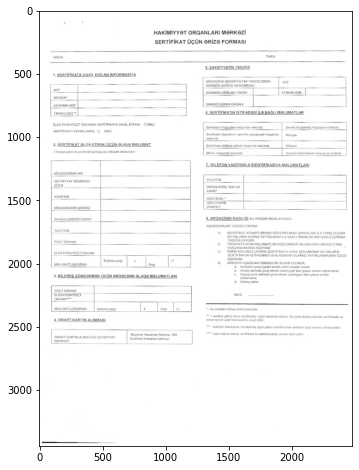

In [6]:
img = cv2.imread("/content/sened_1.jpg")
plt.figure(figsize=(10, 8))
plt.imshow(img)

The language codes used by langdetect follow ISO 639-1 codes. Here, it thinks these are turkish words

In [10]:
# !pip install langdetect
from langdetect import detect_langs

custom_config = r'-l eng+aze --psm 6'
txt = pytesseract.image_to_string(img, config=custom_config)
detect_langs(txt)

[tr:0.5714279319621414, id:0.2857131578505, so:0.14285676898566602]

In [16]:
custom_config = r'-l tur --psm 6'
txt = pytesseract.image_to_string(img, config=custom_config)

In [17]:
print(txt)

3
»
HAKIMIYY3T ORGANLARI MSRKaZi
SERTİFİKAT UÇUN 3RIZ9 FORMASI
NN...
ORİZA TARİX
a na a ye a Aİ amaa İm İG vray İİ en arya ERER. EE
5. Ş8XSİYYSTİN T8SDİOİ
1. SERTİFİKATA DAXİL EDİL&N İNFORMASİYA
ARİZAÇİNİN Ş8XSİYYATİNİ T8SDİO EDAN AZE
Ap Ni , ği
SONSDİN VERİLMO TARİXİ: ETİBARLIDIR: | |
SOYADI»
ATASININ ADI* S8N9Dİ VERSN OROAN
TOXOLLÜSÜ * 6. SERTİFİKATIN İSTİFAD3Sİ İL8 BAĞLI MOLUMATLAR
ELEKTRON POÇT ÜNVANINI SERTİFİKATA DAXİL ETMaK (B8Lİ ği i
Sahibkarın hügugları haggında malumat Sanad imzalamag hüguguna malikdir.
SERTİFİKATI YAYIMLAMAO O B8Lİ iğ 7 il
Sertifikatın teyinatının spesifik xüsusiyyati haggında Maliyya
melumat
2. SERTİFİKAT 8LD3 ETMAK ÜÇÜN 9LAV8 M8LUMAT Sertifikatın istifade sahasi haggında malumat Maliyya
/ hügugi şexs va ya dövlet gullugçusu oldugda doldurulur / ç Möhür haggında melumat Senedi möhürlismak hüguguna malikdir.
7. TELEFON VASİTSSİL3 İDENTİFİKASİYA M8LUMATLARI
MÜ8SSİSENİN ADI ç
VEN Mi |,|, m
VÖEN DOĞULDUĞU YER V9
00000 .
veelrgel GİZLİ SUAL *
GİZLİ CAVAB
MÜ9SSİS